<a href="https://colab.research.google.com/github/amasnaoui/Classification_damaged_not_damaged_car/blob/main/Classification_damaged_not_damaged_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [30]:
device_list = tf.test.gpu_device_name()
device_list

''

In [44]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [48]:
img = image.load_img("/content/drive/MyDrive/car_dammage_detection/training/00-damage/0001.JPEG")

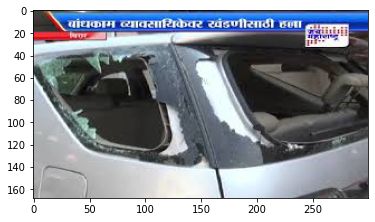

In [49]:
plt.imshow(img)

In [52]:
cv2.imread("/content/drive/MyDrive/car_dammage_detection/training/00-damage/0001.JPEG").shape

(168, 300, 3)

In [34]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [57]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/car_dammage_detection/training/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/car_dammage_detection/validation/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          # classes=['train'],
                                          class_mode = 'binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [60]:
train_dataset.class_indices
validation_dataset.class_indices

{'00-damage': 0, '01-whole': 1}

In [61]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [65]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ])

In [67]:
model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [73]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True,
                                        verbose=1)

In [74]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 25,
                      validation_data = validation_dataset ,
                      callbacks =[earlystopping]   
)

Epoch 1/30
3/3 [==============================] - 11s 5s/step - loss: 0.6999 - accuracy: 0.4444 - val_loss: 0.6616 - val_accuracy: 0.6130
Epoch 2/30
3/3 [==============================] - 11s 5s/step - loss: 0.7231 - accuracy: 0.3333 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 11s 5s/step - loss: 0.7922 - accuracy: 0.5556 - val_loss: 0.6751 - val_accuracy: 0.5261
Epoch 4/30
3/3 [==============================] - 11s 5s/step - loss: 0.6202 - accuracy: 0.6667 - val_loss: 0.6857 - val_accuracy: 0.5043
Epoch 5/30
3/3 [==============================] - 12s 5s/step - loss: 0.7046 - accuracy: 0.5556 - val_loss: 0.6667 - val_accuracy: 0.5370
Epoch 6/30
3/3 [==============================] - 12s 5s/step - loss: 0.6583 - accuracy: 0.4444 - val_loss: 0.6611 - val_accuracy: 0.5848
Epoch 7/30
3/3 [==============================] - 11s 5s/step - loss: 0.7708 - accuracy: 0.4444 - val_loss: 1.1102 - val_accuracy: 0.5000
Epoch 8/30
3/3 [==================